### 2021_11_12_4

### RNN(순환 신경망) 이해하기

### 학습 내용
* RNN에 대해 실습을 통해 알아본다.
* 데이터 셋 : IMDB 영화 리뷰 분류 문제 적용

* SimpleRNN이 하나의 시퀀스가 아니다.
* 다른 케라스 층과 마찬가지로 시퀀스 배치를 처리
    * (timesteps, input_features) 크기 아니다.
    * (batch_size(샘플크기), timesteps, input_features) 크기의 입력

### SimpleRNN 두가지 실행 모드
* return_sequences : 기본값(False)
    * False : 마지막 상태만 출력(Many-to-One)
    * True : 모든 지점의 은닉 상태 출력 (Many-to-Many)

In [1]:
import keras
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

In [2]:
print(keras.__version__)

2.7.0


### Embedding층의 입력
* (samples, 임베딩차원, sequence_length)
    * samples : 샘플수
    * sequence_length : 시퀀스 길이 ( 단순히 길이)
    * 정수 텐서를 입력으로 받음. 2D텐서
* 여기서 sequence_length가 작은 길이의 시퀀스는 0으로 패딩되고, 긴 시퀀스는 잘리게 됩니다.

### Embedding층의 출력
* (samples, sqeuence_length, 임베딩 차원)
    * samples : 샘플수
    * sequence_length : 시퀀스 길이
    * embedding_dimensionality : 임베딩 차원
    * 출력은 3D 텐서가 된다.

### return_sequences = False

In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = False))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


2021-11-12 13:27:39.472125: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 파라미터 개수
* 32 * (32 + 32 + 1) = 2080

### return_sequences = True

In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


### 은닉 상태 출력

In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32)) # 맨 위 층만 마지막 출력을 반환

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


### IMDB 영화 리뷰 분류 문제 풀기

In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # 특성으로 사용할 단어의 수
maxlen = 500         # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용)
batch_size = 32

print("데이터 로딩.......")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)
print("훈련 시퀀스 :", len(input_train))
print("테스트 시퀀스 :", len(input_test))

데이터 로딩.......
훈련 시퀀스 : 25000
테스트 시퀀스 : 25000


In [7]:
input_train.shape, y_train.shape, input_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [8]:
# 문장에서 maxlen 이후의 있는 단어들을 pad_sequences()함수로 잘라낸다.
# 문장 길이가 maxlen보다 작으면 부족한 부분을 0으로 채웁니다. 
print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


### 모델 구축

In [14]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32)) # max_features = 10000
# model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", 
              metrics = ["acc"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [19]:
%%time

history = model.fit(input_train, y_train, 
                    epochs = 15, 
                    batch_size = 128, 
                    validation_split = 0.2)

Epoch 1/15
157/157 [==============================] - 21s 132ms/step - loss: 0.0024 - acc: 0.9994 - val_loss: 1.1213 - val_acc: 0.7818
Epoch 2/15
157/157 [==============================] - 21s 131ms/step - loss: 0.0075 - acc: 0.9977 - val_loss: 1.1177 - val_acc: 0.7916
Epoch 3/15
157/157 [==============================] - 22s 140ms/step - loss: 0.0015 - acc: 0.9995 - val_loss: 1.1276 - val_acc: 0.7886
Epoch 4/15
157/157 [==============================] - 20s 130ms/step - loss: 0.0014 - acc: 0.9996 - val_loss: 1.2830 - val_acc: 0.7488
Epoch 5/15
157/157 [==============================] - 20s 126ms/step - loss: 4.2811e-04 - acc: 0.9999 - val_loss: 1.7148 - val_acc: 0.6950
Epoch 6/15
157/157 [==============================] - 21s 132ms/step - loss: 9.4038e-04 - acc: 0.9996 - val_loss: 1.5188 - val_acc: 0.7228
Epoch 7/15
157/157 [==============================] - 21s 134ms/step - loss: 9.6409e-04 - acc: 0.9997 - val_loss: 1.3639 - val_acc: 0.7606
Epoch 8/15
157/157 [=======================

### 훈련, 검증의 손실과 정확도 그래프 확인

In [20]:
import matplotlib.pyplot as plt

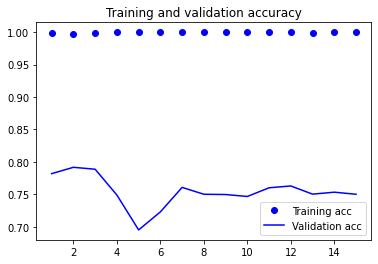

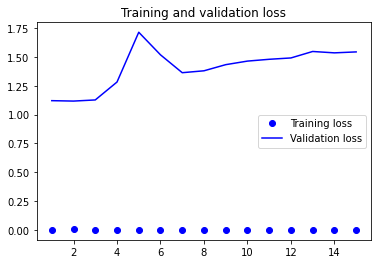

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()